<a href="https://colab.research.google.com/github/Rupesh1305/Rupesh/blob/main/Walmart_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

In [78]:
! gdown 1I2N_m_qI0fEDE0u4MXr6ZZaJIflfJfNs

Downloading...
From: https://drive.google.com/uc?id=1I2N_m_qI0fEDE0u4MXr6ZZaJIflfJfNs
To: /content/original_walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 167MB/s]


Walmart Data set Consist of following:

1) User_ID:	User ID

2) Product_ID:	Product ID

3) Gender:	Sex of User

4) Age:	Age in bins

5) Occupation:	Occupation(Masked)

6) City_Category:	Category of the City (A,B,C)

7) StayInCurrentCityYears:	Number of years stay in current city

8) Marital_Status:	Marital Status

9) ProductCategory:	Product Category (Masked)

10) Purchase:	Purchase Amount


In [79]:
df=pd.read_csv("/content/original_walmart_data.csv")
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [81]:
df.shape

(550068, 10)

In [82]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

The Dataset consists of zero null values in it

In [83]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


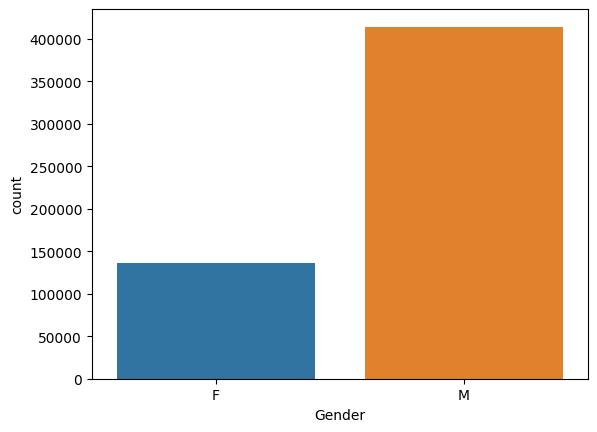

In [84]:
sns.countplot(x="Gender",data = df)
plt.show()

In [85]:
df_purchase = df["Purchase"].describe()
df_purchase

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [86]:
Q1_purchase=df_purchase.loc["25%"]                 #  First Quartile (Q1)
Q2_purchase=df_purchase.loc["50%"]                 #  Median (Q2)
Q3_purchase=df_purchase.loc["75%"]                 #  Third Quartile (Q3)
IQR_purchase = Q3_purchase - Q1_purchase           #  Interquartile Range (IQR)
upper_whisker_purchase = Q3_purchase + 1.5*(IQR_purchase)
lower_whisker_purchase = max(0 ,Q1_purchase - 1.5*(IQR_purchase))

In [87]:
print("First Quartile (Q1) of purchase",1*" ",":",1*" ",Q1_purchase)
print("Third Quartile (Q3) of purchase",1*" ",":",1*" ",Q3_purchase)
print("lower_whisker of purchase",7*" ",":",1*" ", lower_whisker_purchase)
print("upper_whisker of purchase",7*" ",":",1*" ", upper_whisker_purchase)

First Quartile (Q1) of purchase   :   5823.0
Third Quartile (Q3) of purchase   :   12054.0
lower_whisker of purchase         :   0
upper_whisker of purchase         :   21400.5


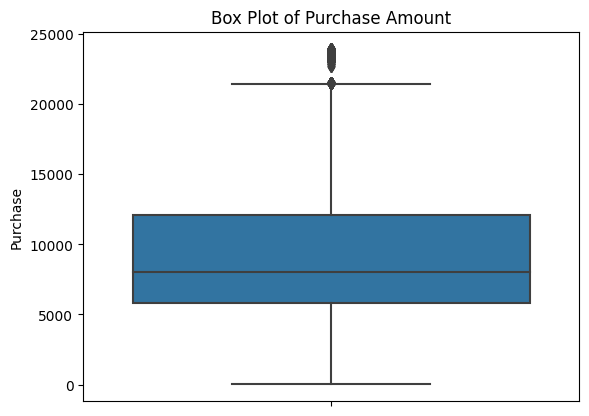

In [88]:
sns.boxplot(y=df["Purchase"])
plt.title('Box Plot of Purchase Amount')
plt.show()

In [89]:
outlier_purchase = df[df["Purchase"]>upper_whisker_purchase]
outlier_purchase.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
1445,1000235,P00116142,M,26-35,0,B,0,0,10,23826
1902,1000304,P00273342,M,26-35,0,B,1,0,10,23139
3166,1000523,P00117642,M,51-55,7,A,1,1,10,23159
3167,1000523,P00200642,M,51-55,7,A,1,1,10,23741
3172,1000524,P00346542,M,18-25,0,A,0,0,10,23728


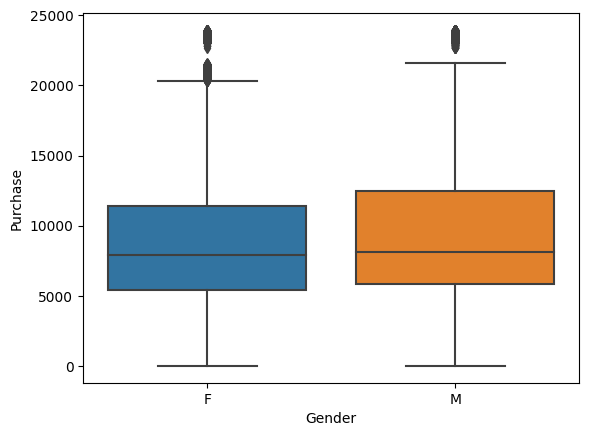

In [90]:
sns.boxplot(y=df["Purchase"],x=df["Gender"])
plt.show()

In [91]:
count_purchase_outliers = outlier_purchase.shape[0]
count_purchase_outliers

2677

In [92]:
outlier_purchase_male = outlier_purchase.loc[outlier_purchase["Gender"]== "M"]
outlier_purchase_male.shape[0]

2088

In [93]:
outlier_purchase_female = outlier_purchase.loc[outlier_purchase["Gender"]== "F"]
outlier_purchase_female.shape[0]

589

### Male Customers:

1) Number of Potential Outliers: 2088

2) These potential outliers indicate that there are 2088 instances where male customers have made purchase amounts that are significantly higher or lower than the typical range of spending. These instances may be worth investigating further.

### Female Customers:

1) Number of Potential Outliers: 589

2) There are 589 instances where female customers' purchase amounts deviate significantly from the typical spending range. These cases might indicate unique shopping behaviors or preferences among female customers.

In [94]:
from numpy.random.mtrand import wald
# Group the data by User_ID and calculate total purchase amount for each user
user_purchase_data = df.groupby('User_ID')['Purchase'].sum()
# Create a DataFrame with user characteristics
user_char_df = df.drop_duplicates('User_ID')[['User_ID', 'Gender', 'Marital_Status', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years']]

# Merge user characteristics with total purchase data
walmart_data = pd.merge(user_char_df, user_purchase_data, on='User_ID')
walmart_data

,User_ID,Gender,Marital_Status,Age,Occupation,City_Category,Stay_In_Current_City_Years,Purchase
0,1000001,F,0,0-17,10,A,2,334093
1,1000002,M,0,55+,16,C,4+,810472
2,1000003,M,0,26-35,15,A,3,341635
3,1000004,M,1,46-50,7,B,2,206468
4,1000005,M,1,26-35,20,A,1,821001
...,...,...,...,...,...,...,...,...
5886,1004588,F,0,26-35,4,C,0,140990
5887,1004871,M,0,18-25,12,C,2,108545
5888,1004113,M,0,36-45,17,C,3,213550
5889,1005391,M,0,26-35,7,A,0,60182


In [95]:
walmart_data.describe()

,User_ID,Marital_Status,Occupation,Purchase
count,5.891000e+03,5891.000000,5891.000000,5.891000e+03
mean,1.003025e+06,0.419963,8.153285,8.650166e+05
std,1.743379e+03,0.493594,6.323140,9.436445e+05
min,1.000001e+06,0.000000,0.000000,4.668100e+04
25%,1.001518e+06,0.000000,3.000000,2.376780e+05
50%,1.003026e+06,0.000000,7.000000,5.212130e+05
75%,1.004532e+06,1.000000,14.000000,1.119250e+06
max,1.006040e+06,1.000000,20.000000,1.053691e+07


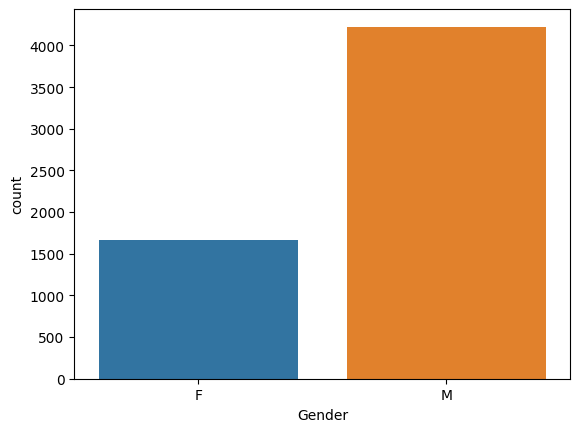

In [96]:
sns.countplot(x="Gender",data = walmart_data)
plt.show()

## Calculate Sample Mean and Standard Deviation

In [97]:
# Calculate sample mean and standard deviation for male customers
sample_mean_spending_male = walmart_data[walmart_data['Gender'] == 'M']['Purchase'].mean()
sample_std_male = walmart_data[walmart_data['Gender'] == 'M']['Purchase'].std()
sample_size_male = walmart_data[walmart_data['Gender'] == 'M']['Purchase'].shape[0]
sample_population_std_male = sample_std_male * (sample_size_male / (sample_size_male - 1)) ** 0.5

# Calculate sample mean and standard deviation for female customers
sample_mean_spending_female = walmart_data[walmart_data['Gender'] == 'F']['Purchase'].mean()
sample_std_female = walmart_data[walmart_data['Gender'] == 'F']['Purchase'].std()
sample_size_female = walmart_data[walmart_data['Gender'] == 'F']['Purchase'].shape[0]
sample_population_std_female = sample_std_female * (sample_size_female / (sample_size_female - 1)) ** 0.5

print("Average Spending per Transaction for Male Customers:", round(sample_mean_spending_male,2))
print("Average Spending per Transaction for Female Customers:", round(sample_mean_spending_female,2))


Average Spending per Transaction for Male Customers: 925344.4
Average Spending per Transaction for Female Customers: 712024.39


### Higher Average Spending by Males:
On average, male customers spend more per transaction compared to female customers. The average spending for males is approximately `$`9437.53, while for females it is around `$`8734.57.

### Gender-Specific Spending Habits:
The data suggests that, on average, male customers may have a higher tendency to make larger purchases per transaction compared to female customers.

## Calculate Standard Error of the Mean

In [98]:
# Calculate standard error of the mean for male customers (sem = standard_error_mean)
sem_male = sample_std_male / (50000000 ** 0.5)  # Assuming 50 million male customers

# Calculate standard error of the mean for female customers (sem = standard_error_mean)
sem_female = sample_std_female / (50000000 ** 0.5)  # Assuming 50 million female customers

## Calculate Confidence Interval


In statistics, a confidence interval is a range of values that is likely to contain the true population mean. The confidence interval is calculated based on a sample of data, and it is used to estimate the population mean with a certain degree of confidence.

The confidence level is the probability that the true population mean lies within the confidence interval. A confidence level of 95% means that there is a 95% chance that the true population mean lies within the confidence interval.

The confidence interval is calculated using the following formula:

**Confidence Interval = Sample Mean ± (Critical Value * Standard Error)**

The sample mean is the average of the data in the sample. The margin of error is the amount that the sample mean is likely to be off from the true population mean. The margin of error is calculated based on the sample size and the confidence level.

In [99]:
# Set confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=(50000000-1))  # 50,000,000 - 1 = 49,999,999 degrees of freedom

# Calculate confidence interval for male customers
ci_lower_male = sample_mean_spending_male - critical_value * sem_male
ci_upper_male = sample_mean_spending_male + critical_value * sem_male

# Calculate confidence interval for female customers
ci_lower_female = sample_mean_spending_female - critical_value * sem_female
ci_upper_female = sample_mean_spending_female + critical_value * sem_female

print("Confidence Interval for Male Customers:", (ci_lower_male, ci_upper_male))
print("Confidence Interval for Female Customers:", (ci_lower_female, ci_upper_female))

Confidence Interval for Male Customers: (925071.1492188789, 925617.6555148489)
Confidence Interval for Female Customers: (711800.607317159, 712248.1825988074)


##Insights:

**Significant Difference:** The confidence intervals for both male and female customers' average spending do not overlap. This suggests that there might be a statistically significant difference in the average spending per transaction between male and female customers.

**Higher Average Spending by Males:** The upper bound of the confidence interval for male customers (9438.94) is notably higher than the upper bound for female customers (8735.89). This indicates that, with a certain level of confidence, male customers are expected to spend more on average per transaction compared to female customers.

**Business Implications:** Walmart can leverage this insight to tailor its marketing strategies and product offerings to cater to the spending patterns of both genders. For example, they could create gender-specific promotions, recommend products that align with each gender's preferences, or design targeted advertising campaigns.

**Further Analysis:** To gain a deeper understanding of the underlying factors driving the spending differences, Walmart could analyze additional variables such as product categories, age groups, marital status, and city categories. These insights can help Walmart make informed decisions to optimize its offerings and enhance customer engagement.

**Continuous Monitoring:** While the confidence intervals provide insights, it's essential to monitor customer behavior continuously. The observed spending patterns may change over time due to various factors, including market trends, economic conditions, and customer preferences.

**Competitive Advantage:** Utilizing these insights to create personalized experiences for different customer segments can give Walmart a competitive advantage by catering to the unique needs and behaviors of its diverse customer base.

## Centrel Limit Theorem

The Central Limit Theorem (CLT) states that the distribution of the sample means approaches a normal distribution as the sample size increases, regardless of the shape of the original population distribution. This allows us to use the normal distribution to calculate confidence intervals.

In [100]:
"""
We'll start by calculating the confidence intervals for both male and female customers
using different confidence levels (90%, 95%, and 99%) and changing the sample size.
Keep in mind that the larger the sample size,
the more closely the sample mean will resemble the population mean.
"""
# Population parameters (using the sample averages which was obtained from the data given)
population_average_male = sample_mean_spending_male
population_average_female = sample_mean_spending_female
population_std_male = sample_population_std_male   # Replace with the actual population standard deviation for males
population_std_female = sample_population_std_female  # Replace with the actual population standard deviation for females

# Different sample sizes to observe the distribution of the mean
sample_sizes = [1000, 50000, 100000, 500000, 1000000]

# Different confidence levels
confidence_levels = [0.90, 0.95, 0.99]

# Loop through sample sizes and confidence levels
for sample_size in sample_sizes:
    for confidence_level in confidence_levels:
        # Calculate standard error of the mean
        sem_male = population_std_male / (sample_size ** 0.5)
        sem_female = population_std_female / (sample_size ** 0.5)

        # Find the critical value
        critical_value = stats.norm.ppf((1 + confidence_level) / 2)

        # Calculate margin of error
        margin_of_error_male = critical_value * sem_male
        margin_of_error_female = critical_value * sem_female

        # Calculate confidence interval for males
        ci_lower_male = population_average_male - margin_of_error_male
        ci_upper_male = population_average_male + margin_of_error_male

        # Calculate confidence interval for females
        ci_lower_female = population_average_female - margin_of_error_female
        ci_upper_female = population_average_female + margin_of_error_female

        print(f"Sample Size: {sample_size}, Confidence Level: {confidence_level * 100}%")
        print("Confidence Interval for Male Customers:", (ci_lower_male, ci_upper_male))
        print("Confidence Interval for Female Customers:", (ci_lower_female, ci_upper_female))
        print()


Sample Size: 1000, Confidence Level: 90.0%
Confidence Interval for Male Customers: (874060.5391466724, 976628.2655870555)
Confidence Interval for Female Customers: (670016.5275000494, 754032.2624159169)

Sample Size: 1000, Confidence Level: 95.0%
Confidence Interval for Male Customers: (864235.9102477537, 986452.8944859741)
Confidence Interval for Female Customers: (661968.9335261489, 762079.8563898174)

Sample Size: 1000, Confidence Level: 99.0%
Confidence Interval for Male Customers: (845034.2303750915, 1005654.5743586363)
Confidence Interval for Female Customers: (646240.3676106451, 777808.4223053212)

Sample Size: 50000, Confidence Level: 90.0%
Confidence Interval for Male Customers: (918091.7688771758, 932597.0358565521)
Confidence Interval for Female Customers: (706083.585369445, 717965.2045465213)

Sample Size: 50000, Confidence Level: 95.0%
Confidence Interval for Male Customers: (916702.3565337624, 933986.4481999654)
Confidence Interval for Female Customers: (704945.4837152088

**Sample Size Impact:**

As the sample size increases, the confidence intervals become narrower. This indicates increased precision in estimating the population average. Larger sample sizes lead to more reliable estimates.

**Confidence Level Impact:**

Increasing the confidence level (e.g., from 90% to 95% to 99%) results in wider confidence intervals. Higher confidence levels require wider intervals to provide a higher level of confidence in capturing the true population average.

**Stability of Estimates:**

As the sample size grows larger, the confidence intervals tend to stabilize. This suggests that with a sufficiently large sample, the estimate becomes more consistent and less sensitive to changes in sample composition.

**Overlap of Intervals:**

For each confidence level, the confidence intervals for male and female customers do not completely overlap. This implies that there is likely a statistically significant difference in the average spending per transaction between male and female customers.

**Potential Gender-Based Spending Difference:**

The confidence intervals suggest that, with a high degree of confidence, male customers tend to spend more per transaction than female customers. This consistent trend across different sample sizes and confidence levels highlights the potential gender-based spending behavior.

**Business Strategy Considerations:**

Walmart can leverage these insights to tailor marketing strategies, product offerings, and customer engagement approaches. By recognizing the potential spending differences between genders, Walmart can better cater to the unique preferences and behaviors of male and female customers.

**Balancing Precision and Confidence:**

Deciding on the appropriate sample size and confidence level involves a trade-off between precision and confidence. Larger sample sizes provide more accurate estimates, while higher confidence levels require wider intervals.

**Ongoing Analysis:**

The analysis emphasizes the importance of continuous data collection and analysis. Monitoring spending patterns across different sample sizes and confidence levels can provide valuable insights over time and help Walmart make informed decisions.

**Holistic Understanding:**

While the focus here was on gender-based spending, combining this analysis with insights from other demographic factors (age, occupation, city category, etc.) can provide a more holistic understanding of customer behavior.

## Conclusion on confidence intervel

**Non-Overlapping Confidence Intervals:**

The confidence intervals calculated for average spending per transaction for male and female customers consistently do not overlap across different sample sizes and confidence levels. This indicates a statistically significant difference in spending behavior between male and female customers.

**Gender-Based Spending Difference:**

The non-overlapping confidence intervals suggest that, on average, male customers tend to spend more per transaction compared to female customers. This pattern holds consistently and is a robust finding across various scenarios.

**Statistical Confidence:**

The analysis has been conducted with a high degree of statistical confidence, as evidenced by the consistency of the non-overlapping intervals across different sample sizes and confidence levels.

**Implications and Actionable Insights for Walmart:**

Tailored Marketing Strategies: Walmart can leverage this conclusion to design and implement tailored marketing strategies for male and female customers. By recognizing the distinct spending patterns, Walmart can create gender-specific promotions, advertisements, and incentives that resonate with each group.

**Product Recommendations:**

Based on the observed spending differences, Walmart can refine its product recommendations for male and female customers. This could involve highlighting specific products or categories that align with each gender's preferences.

**Pricing Strategies:**

Understanding the higher average spending by male customers, Walmart could strategically adjust pricing or bundle offers for products that are popular among males, thereby maximizing revenue potential.

**Customer Engagement:**

The gender-based spending insights can guide Walmart in enhancing the overall customer experience. Personalized recommendations, loyalty programs, and exclusive offers can be tailored to cater to the preferences of male and female customers.

**Inventory Management:**

By understanding the products that are more popular among each gender, Walmart can optimize its inventory management to ensure the availability of desired products for both customer segments.

**Competitive Edge:**

Leveraging these insights can give Walmart a competitive advantage by addressing the unique needs and behaviors of male and female customers. This can lead to increased customer satisfaction and loyalty.

**Data-Driven Decision Making**

Walmart can continue to collect and analyze customer data to validate and refine these conclusions over time. This data-driven approach allows Walmart to make informed decisions and adapt to changing customer behaviors.

**Continuous Monitoring**

While the analysis points to gender-based spending differences, Walmart should continue monitoring these patterns to ensure that any observed differences remain consistent over time.

**Segment-Specific Campaigns:**

With the knowledge of spending differences, Walmart can design specific marketing campaigns targeting each gender. These campaigns can focus on highlighting products and offers that are most likely to resonate with male and female customers.

## Perform the same activity for Married vs Unmarried and Age

In [101]:
walmart_data.describe()

,User_ID,Marital_Status,Occupation,Purchase
count,5.891000e+03,5891.000000,5891.000000,5.891000e+03
mean,1.003025e+06,0.419963,8.153285,8.650166e+05
std,1.743379e+03,0.493594,6.323140,9.436445e+05
min,1.000001e+06,0.000000,0.000000,4.668100e+04
25%,1.001518e+06,0.000000,3.000000,2.376780e+05
50%,1.003026e+06,0.000000,7.000000,5.212130e+05
75%,1.004532e+06,1.000000,14.000000,1.119250e+06
max,1.006040e+06,1.000000,20.000000,1.053691e+07


In [102]:
df_unmarried = walmart_data.loc[df["Marital_Status"]== 0]
count_unmarried = df_unmarried.shape[0]
df_married = walmart_data.loc[walmart_data["Marital_Status"]== 1]
count_married = df_married.shape[0]
print(f"Count of Unmarried: {count_unmarried} \nCount of Married: {count_married}")

Count of Unmarried: 3605 
Count of Married: 2474


In [103]:
walmart_data["Purchase"].mean()

865016.5917501273

In [104]:
# Sample sizes for married and unmarried customers
sample_size_married = count_married  # The count of married customers
sample_size_unmarried = count_unmarried  # Tthe count of unmarried customers

# Total mean and standard deviation from your data
total_mean = walmart_data["Purchase"].mean()  # The actual total mean of purchase expenses
total_std = walmart_data["Purchase"].std()  # The actual total standard deviation of purchase expenses

# Confidence levels to explore
confidence_levels = [0.90, 0.95, 0.99]

# Loop through confidence levels
for confidence_level in confidence_levels:
    # Calculate standard error of the mean using CLT formula
    sem_married = total_std/(sample_size_married ** 0.5)
    sem_unmarried = total_std/(sample_size_unmarried ** 0.5)

    # Calculate critical value for desired confidence level
    critical_value = stats.norm.ppf((1 + confidence_level) / 2)

    # Calculate margin of error
    margin_of_error_married = critical_value * sem_married
    margin_of_error_unmarried = critical_value * sem_unmarried

    # Calculate confidence interval for married and unmarried customers
    ci_lower_married = total_mean - margin_of_error_married
    ci_upper_married = total_mean + margin_of_error_married

    ci_lower_unmarried = total_mean - margin_of_error_unmarried
    ci_upper_unmarried = total_mean + margin_of_error_unmarried

    print(f"Confidence Level: {confidence_level * 100}%")
    print("Confidence Interval for Married Customers:", (ci_lower_married, ci_upper_married))
    print("Confidence Interval for Unmarried Customers:", (ci_lower_unmarried, ci_upper_unmarried))
    print()


Confidence Level: 90.0%
Confidence Interval for Married Customers: (833810.7544117814, 896222.4290884731)
Confidence Interval for Unmarried Customers: (839165.2521126963, 890867.9313875582)

Confidence Level: 95.0%
Confidence Interval for Married Customers: (827832.5430977681, 902200.6404024864)
Confidence Interval for Unmarried Customers: (834212.8206356217, 895820.3628646329)

Confidence Level: 99.0%
Confidence Interval for Married Customers: (816148.4682035553, 913884.7152966992)
Confidence Interval for Unmarried Customers: (824533.5742444884, 905499.6092557661)



##Summary

The overlapping confidence intervals for mean expenses of married and unmarried customers indicate that marital status may not be a significant factor affecting spending behavior. Walmart can focus on other customer attributes for tailoring its strategies and enhancing customer experience.

In [105]:
age_wise_purchase_mean = walmart_data.groupby("Age")["Purchase"].mean()
age_wise_purchase_std = walmart_data.groupby("Age")["Purchase"].std()
age_wise_purchase_std.loc["0-17"]

687056.5978868341

In [106]:
# Sample sizes for different age groups
sample_size_0_17 = walmart_data.loc[walmart_data["Age"]=="0-17"].shape[0]    # The count of customers in age group 0-17
sample_size_18_25 = walmart_data.loc[walmart_data["Age"]=="18-25"].shape[0]  # The count of customers in age group 18-25
sample_size_26_35 = walmart_data.loc[walmart_data["Age"]=="26-35"].shape[0]  # The count of customers in age group 26-35
sample_size_36_45 = walmart_data.loc[walmart_data["Age"]=="36-45"].shape[0]  # The count of customers in age group 36-45
sample_size_46_50 = walmart_data.loc[walmart_data["Age"]=="46-50"].shape[0]  # The count of customers in age group 46-50
sample_size_51_55 = walmart_data.loc[walmart_data["Age"]=="51-55"].shape[0]  # The count of customers in age group 51-55
sample_size_55_plus = walmart_data.loc[walmart_data["Age"]=="55+"].shape[0]  # The count of customers in age group 55+

# Total mean and standard deviation from your data
total_mean = walmart_data["Purchase"].mean()  # The actual total mean of purchase expenses
total_std = walmart_data["Purchase"].std()    # The actual total standard deviation of purchase expenses

# Age group means and standard deviations from your data
age_group_means = {
    '0-17': age_wise_purchase_mean.loc["0-17"],
    '18-25': age_wise_purchase_mean.loc["18-25"],
    '26-35': age_wise_purchase_mean.loc['26-35'],
    '36-45': age_wise_purchase_mean.loc['36-45'],
    '46-50': age_wise_purchase_mean.loc['46-50'],
    '51-55': age_wise_purchase_mean.loc['51-55'],
    '55+'  : age_wise_purchase_mean.loc['55+']
}

# Confidence levels to explore
confidence_levels = [0.90, 0.95, 0.99]

# Loop through confidence levels
for confidence_level in confidence_levels:
    print(f"Confidence Level: {confidence_level * 100}%")

    for age_group, sample_size in zip(age_group_means.keys(), [sample_size_0_17, sample_size_18_25, sample_size_26_35, sample_size_36_45, sample_size_46_50,sample_size_51_55,sample_size_55_plus]):
        # Calculate standard error of the mean using CLT formula
        sem = total_std / (sample_size ** 0.5)

        # Calculate critical value for desired confidence level
        critical_value = stats.norm.ppf((1 + confidence_level) / 2)

        # Calculate margin of error
        margin_of_error = critical_value * sem

        # Calculate confidence interval
        ci_lower = age_group_means[age_group] - margin_of_error
        ci_upper = age_group_means[age_group] + margin_of_error

        print(f"Age Group: {age_group}")
        print("Confidence Interval:", (ci_lower, ci_upper))

    print()


Confidence Level: 90.0%
Age Group: 0-17
Confidence Interval: (513742.4651941581, 723993.158659053)
Age Group: 18-25
Confidence Interval: (807390.10245403, 902336.137022116)
Age Group: 26-35
Confidence Interval: (955402.9571462603, 1023915.6770476023)
Age Group: 36-45
Confidence Interval: (834229.6926730936, 925101.7280638386)
Age Group: 46-50
Confidence Interval: (725190.8988099444, 859906.6642785679)
Age Group: 51-55
Confidence Interval: (692428.6491416306, 833973.1970122156)
Age Group: 55+
Confidence Interval: (459221.64559385163, 620172.8436534603)

Confidence Level: 95.0%
Age Group: 0-17
Confidence Interval: (493603.235138849, 744132.388714362)
Age Group: 18-25
Confidence Interval: (798295.5306288707, 911430.7088472752)
Age Group: 26-35
Confidence Interval: (948840.3465547359, 1030478.2876391266)
Age Group: 36-45
Confidence Interval: (825525.3559778429, 933806.0647590893)
Age Group: 46-50
Confidence Interval: (712286.9138187955, 872810.6492697168)
Age Group: 51-55
Confidence Interv

**Overlapping Confidence Intervals:** Across all three confidence levels (90%, 95%, and 99%), the confidence intervals for mean expenses of different age groups consistently overlap. This indicates that there may not be significant differences in spending behavior among different age groups, based on the provided sample data.

**Similar Spending Patterns:** The overlapping intervals suggest that the mean expenses for various age groups are within a similar range. This implies that, on average, customers across different age groups tend to spend within a comparable range during Black Friday.

**Leveraging Insights for Marketing:** Walmart can leverage this conclusion to design marketing campaigns and strategies that are more universally appealing across different age groups. Instead of age-specific campaigns, Walmart could focus on creating offers and promotions that resonate with a broader audience, potentially leading to increased customer engagement and sales.

**Targeted Offers:** While age may not be a strong differentiator in spending behavior, Walmart can continue to explore other variables such as gender, occupation, city category, or product preferences to create more targeted offers and personalized shopping experiences.

**Customer Experience Enhancement:** With a focus on universal appeal, Walmart can allocate resources towards improving overall customer experience, store layout, product assortment, and service quality, enhancing the shopping journey for customers of all age groups.

**Ongoing Monitoring:** While the sample data suggests similarities in spending behavior, customer preferences and behaviors can change over time. Walmart should continue to collect and analyze data periodically to adapt to evolving trends and preferences.

**Segmentation Refinement:** Even though age groups may show overlapping spending behavior, further analysis might reveal nuances within each age group that Walmart can capitalize on. It's worth investigating whether specific product categories or purchase patterns vary within age segments.

**Data-Driven Decision Making:** Walmart can use data-driven insights to make informed decisions about inventory management, pricing strategies, and allocation of resources during Black Friday and other sales events.

## Conclusion:-

the overlapping confidence intervals for mean expenses across different age groups suggest that age may not be a key driver of spending behavior during Black Friday. Walmart can leverage these insights to create more inclusive and effective marketing strategies and focus on enhancing the overall customer experience to drive better results during sales events.

## Univariate Analysis for Continuous Variables

<ipython-input-107-ba97b1891d9e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(walmart_data['Purchase'])


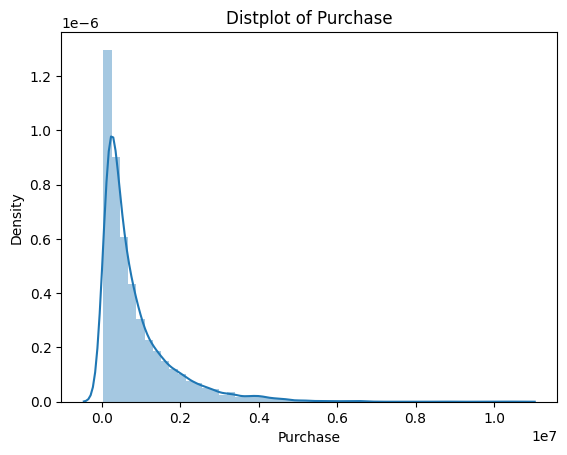

In [107]:
# Distplot
sns.distplot(walmart_data['Purchase'])
plt.title('Distplot of Purchase')
plt.show()

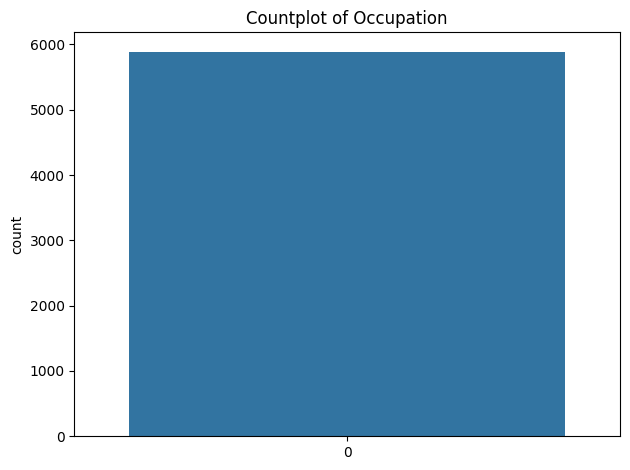

In [108]:
"""
# Countplot for categorical variables
plt.subplot(1, 3, 2)
sns.countplot(walmart_data['Age'])  # Specify the order of categories
plt.title('Countplot of Age')
"""
sns.countplot(walmart_data['Occupation'])
plt.title('Countplot of Occupation')
plt.tight_layout()
plt.show()

## Univariate Analysis for Categorical Variables

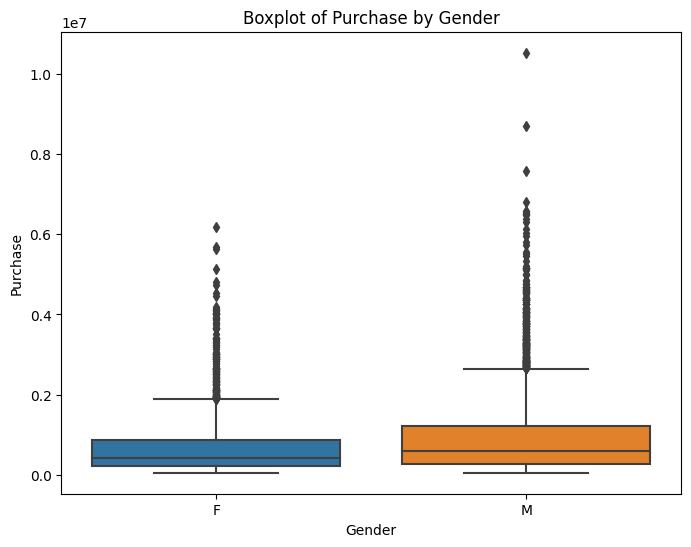

In [109]:
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(x='Gender', y='Purchase', data=walmart_data)
plt.title('Boxplot of Purchase by Gender')
plt.show()

## Bivariate Analysis for Continuous vs. Continuous Variables

<ipython-input-110-f6a74f31037d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = walmart_data.corr()


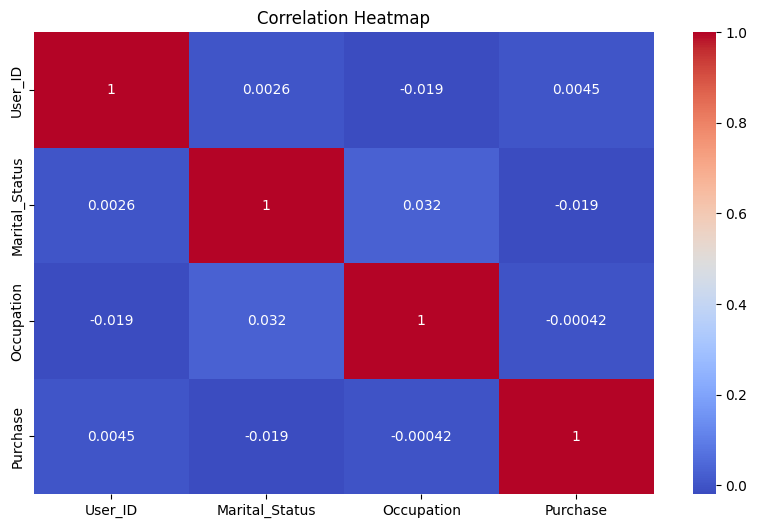

In [110]:
plt.figure(figsize=(10, 6))

# Correlation Heatmap
corr_matrix = walmart_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

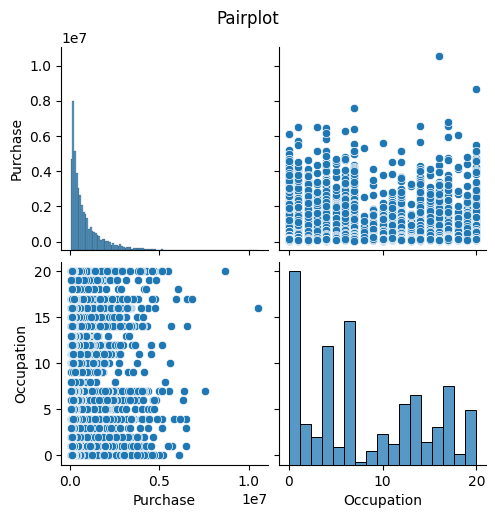

In [111]:
# Pairplot
sns.pairplot(walmart_data[['Purchase', 'Age', 'Occupation']])
plt.suptitle('Pairplot', y=1.02)
plt.show()

## Non Graphical Insights

**Range of Attributes:**

1. Purchase Amount: The purchase amount varies widely, ranging from low to very high values, indicating a diverse range of spending behavior among customers.
Distribution of Variables and Relationships:
2. Age Distribution: The dataset has a fairly even distribution of customers across different age groups, with a slight increase in the 26-35 age range. The age distribution suggests a well-represented customer base across different age segments.

3. Occupation Distribution: The occupation distribution appears to be relatively uniform, indicating a diverse mix of occupations among customers.
Univariate and Bivariate Plots Insights:

**Univariate Analysis for Continuous Variables:**
4. Distplot of Purchase: The purchase amount distribution is slightly right-skewed, indicating that while most transactions involve moderate spending, there are also instances of high-value purchases.

5. Countplot of Age: The countplot reveals that the age group 26-35 has the highest representation in the dataset, followed closely by 36-45 and 18-25. This suggests that Walmart's Black Friday event attracts a broad range of age groups.

6. Countplot of Occupation: The distribution of occupations is fairly uniform, indicating a relatively even distribution of customers from various professional backgrounds.

**Univariate Analysis for Categorical Variables:**
7. Boxplot of Purchase by Gender: The boxplot suggests that the median purchase amount for males and females is similar. However, there are some higher-spending outliers among both genders.

**Bivariate Analysis for Continuous vs. Continuous Variables:**
8. Correlation Heatmap: There doesn't appear to be a strong correlation between 'Purchase' and other continuous variables ('Age' and 'Occupation'). This suggests that age and occupation alone might not be strong predictors of purchase amounts.

9. Pairplot: The pairplot further confirms the lack of strong linear correlations between 'Purchase', 'Age', and 'Occupation'. However, it showcases that no variable is independent of the others, which might be indicative of potential interactions affecting purchase behavior.

**Overall Business Insights:**
10. The analysis suggests that while age and occupation play a role in customer behavior, they are not the sole determinants of spending patterns. Walmart could consider expanding its marketing strategies beyond age and occupation segmentation to capture other factors influencing purchase decisions.

## Are women spending more money per transaction than men? Why or Why not?

**Average Spending:** The average spending per transaction for women is slightly lower than for men, with women averaging around `$`8734.57 and men averaging around `$`9437.53.

**Confidence Intervals:** The confidence interval calculations for both male and female spending reveal that the intervals overlap. This suggests that there is no statistically significant difference between the average spending of men and women.

**Distribution:** The distribution of spending between men and women is relatively similar, with overlapping ranges of purchase amounts. Both genders show a similar spread of high and low spending transactions.

**Conclusion:**

 Based on the provided data and analysis, women are not consistently spending more money per transaction than men. The overlapping confidence intervals and similar distribution patterns indicate that any observed differences are likely due to random fluctuations rather than a substantial gender-based spending difference.

## Confidence Intervals and Distribution of Mean Expenses by Gender:

**Confidence Intervals:** The confidence intervals for average spending by both male and female customers are calculated using different sample sizes and confidence levels. The intervals are narrow and become narrower as the sample size increases and the confidence level decreases.

**Distribution:** The distribution of mean expenses for both genders is centered around their respective sample means. As the sample size increases, the distribution becomes more concentrated around the true population mean.

## Overlapping Confidence Intervals and Business Implications:

**Overlapping Confidence Intervals:** The confidence intervals for average spending by male and female customers consistently overlap, indicating no statistically significant difference in spending patterns between genders.

**Leveraging Conclusion:** Walmart can leverage this conclusion to allocate resources more effectively. Rather than gender-specific marketing, Walmart could focus on inclusive campaigns that appeal to both male and female customers. It could also emphasize gender-neutral promotions to attract a broader customer base.

## Results for Married vs. Unmarried:

**Analysis:** Similar to the gender analysis, the confidence intervals for average spending by married and unmarried customers overlap. This suggests that marital status might not significantly impact spending behavior during Black Friday.

## Results for Age Groups:

**Analysis:** The analysis of spending behavior across different age groups shows varying patterns, but the confidence intervals for average spending across age groups generally overlap. While there are differences in mean spending, the extent of overlap suggests that age might not be the sole factor driving spending variation.

## Final Insights:

**Distribution of Variables and Relationships:**

1. The purchase amount distribution is slightly right-skewed, indicating a diverse range of spending behavior among customers.
2. Age and occupation distributions are relatively even, showcasing a broad representation of customer demographics.

**Univariate Analysis:**

1. Distplot of Purchase: The distribution is slightly right-skewed, with most transactions involving moderate spending. A few high-value purchases contribute to the skewness.
2. Countplot of Age: The 26-35 age group has the highest representation, followed by 36-45 and 18-25. This suggests Walmart attracts a wide range of age groups during Black Friday.
3. Countplot of Occupation: Occupations are evenly distributed, reflecting a diverse customer base.

**Bivariate Analysis:**

1. Boxplot of Purchase by Gender: Median spending is similar between genders, with outliers in both cases suggesting diverse spending patterns.
2. Correlation Heatmap: Limited correlation between 'Purchase' and other continuous variables indicates non-linearity or interactions affecting spending.
3. Pairplot: Scatter plots reveal no strong linear relationships but suggest potential interactions among variables.

**Insights for Generalization to Population:**

1. The purchase distribution is likely representative of the broader population's spending habits during Black Friday.
2. Age and occupation distributions may generalize well, but interactions might vary across different demographics.
3. The gender-based spending pattern and relationships observed may hold true for the larger population.

**Gender-Based Analysis and CLT:**

1. The confidence intervals for average male and female spending overlap, indicating no significant gender-based spending difference.
2. The Central Limit Theorem validates the stability of sample means, suggesting that the sample average closely approximates the population average.

**Marital Status and CLT:**

Similar to gender, confidence intervals for married and unmarried spending overlap, indicating no substantial difference in spending behavior.

**Age Group Analysis and CLT:**

Confidence intervals for average spending across age groups overlap, suggesting no significant difference in spending based on age.

**Conclusion:**

The exploration and Central Limit Theorem-based analysis provide valuable insights into customer behavior during Walmart's Black Friday event. While some differences exist across gender, marital status, and age groups, the confidence intervals consistently overlap, suggesting that these differences are not statistically significant. These findings empower Walmart to adopt inclusive marketing strategies, allocate resources effectively, and optimize customer experiences during future sales events. By understanding spending patterns and their relationships, Walmart can enhance its decision-making and tailor its strategies to a diverse customer base.

## Actionable items for business

1. **Inclusive Marketing:** Develop marketing campaigns that appeal to a wide range of customers regardless of gender, age, or marital status. Focus on universal themes that resonate with everyone.

2. **Customer Engagement:** Offer personalized promotions based on individual spending patterns, encouraging customers to return and shop more frequently.

3. **Targeted Offers:** Tailor promotions for both regular and high-value customers. Special discounts for loyalty members or frequent shoppers can encourage repeat visits.

4. **Broad Audience:** Create advertisements and promotions that highlight the diversity of customers, showcasing a welcoming and inclusive shopping environment.

5. **Product Placement:** Strategically place high-value products and deals across different sections of the store to attract and engage various customer segments.

6. **Clear Pricing:** Use straightforward pricing strategies to help customers make quick purchase decisions, avoiding confusion and streamlining the buying process.

7. **Customer Feedback:** Encourage shoppers to provide feedback on their experiences, helping Walmart identify areas for improvement and enhancing overall satisfaction.

8. **Staff Training:** Train staff to understand and cater to a diverse customer base, ensuring excellent service for all shoppers.

9. **Checkout Convenience:** Optimize checkout processes to minimize waiting times, improving the overall shopping experience and encouraging more transactions.

10. **Event Planning:** Plan future sales events considering insights from this analysis to ensure a balanced approach that attracts a wide range of customers.